In [12]:
#  Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Step 2: Load the Data
df1 = pd.read_csv('../data/Year 2009-2010.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('../data/Year 2010-2011.csv', encoding='ISO-8859-1')

#  Step 3: Combine Both Years
df = pd.concat([df1, df2], ignore_index=True)

#  Step 4: View Basic Info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRA

In [13]:
#  Step 5.1: Check for missing values
print("\nMissing values:\n", df.isnull().sum())

#  Step 5.2: Drop rows with missing CustomerID or Description
df = df.dropna(subset=['Customer ID', 'Description'])

#  Step 5.3: Remove duplicates
df = df.drop_duplicates()

#  Step 5.4: Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#  Step 5.5: Remove cancelled orders (InvoiceNo starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

#  Step 5.6: Remove rows with non-positive Quantity or Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

#  Final shape after cleaning
print("\nFinal shape after cleaning:", df.shape)



Missing values:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Final shape after cleaning: (779425, 8)


In [14]:
#  Step 6.1: Create a Revenue column
df['Revenue'] = df['Quantity'] * df['Price']


C:\Users\mk199\AppData\Local\Temp\ipykernel_2772\3672928819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


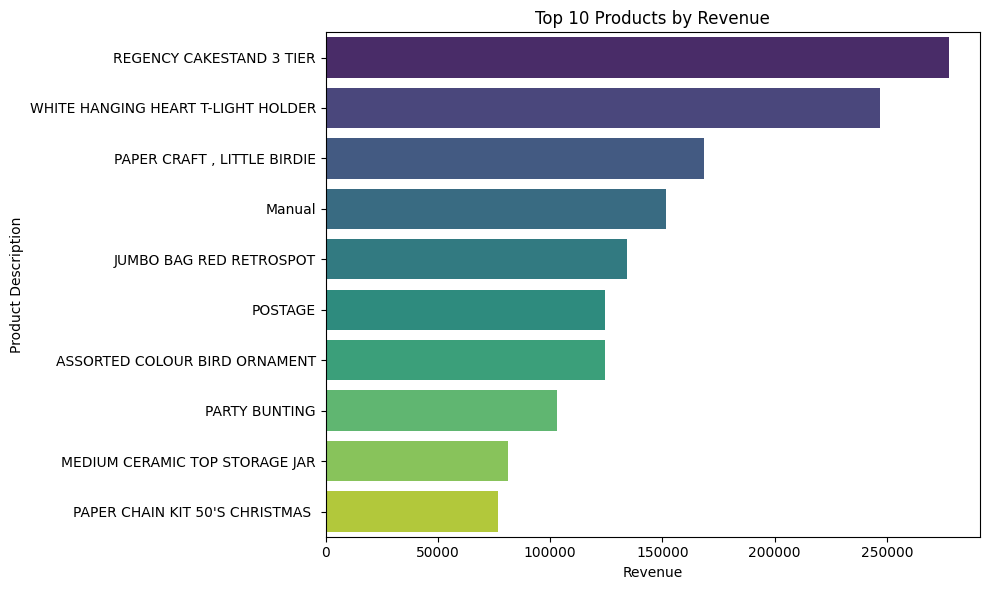

In [15]:
#  Top 10 Products by Revenue
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.savefig('../images/top_products.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\mk199\AppData\Local\Temp\ipykernel_2772\1049074614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_rev.values, y=country_rev.index, palette='coolwarm')


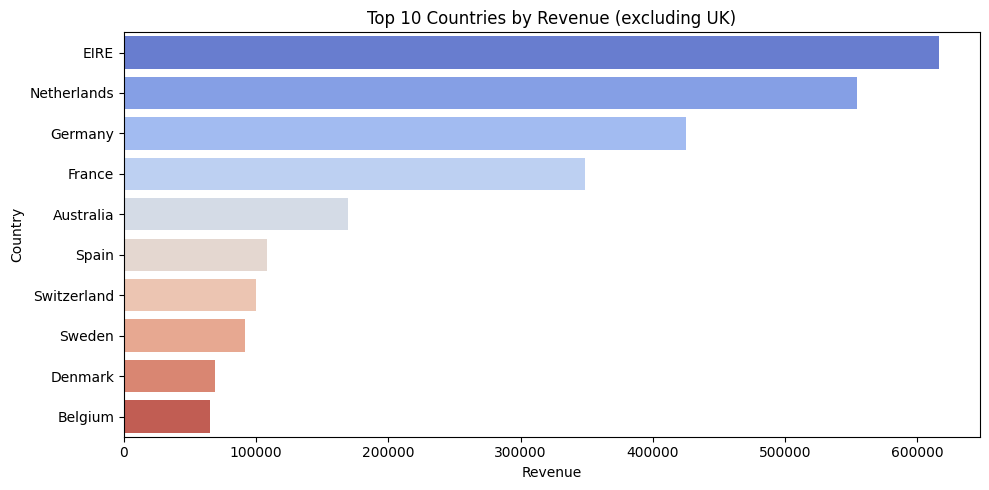

In [16]:
#  Total Revenue by Country (excluding United Kingdom to see others)
country_rev = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_rev = country_rev[country_rev.index != 'United Kingdom'].head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_rev.values, y=country_rev.index, palette='coolwarm')
plt.title('Top 10 Countries by Revenue (excluding UK)')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('../images/Top 10 Countries by Revenue.png', bbox_inches='tight', dpi=300)
plt.show()


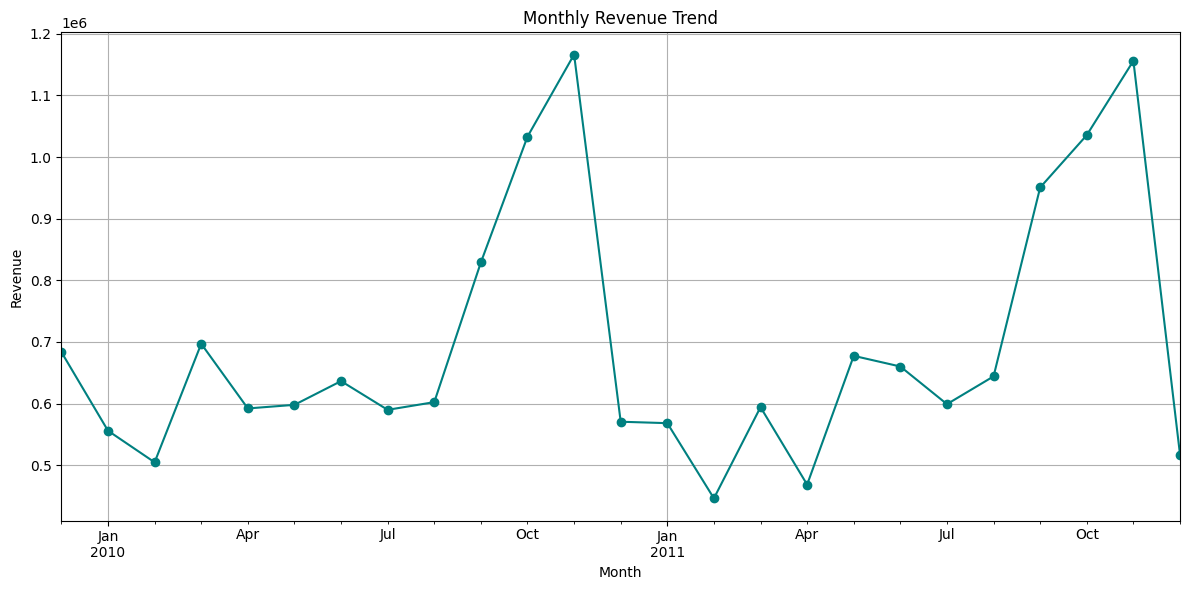

In [17]:
#  Monthly Revenue Trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['Revenue'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/Monthly Revenue Trend.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\mk199\AppData\Local\Temp\ipykernel_2772\870516140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='magma')


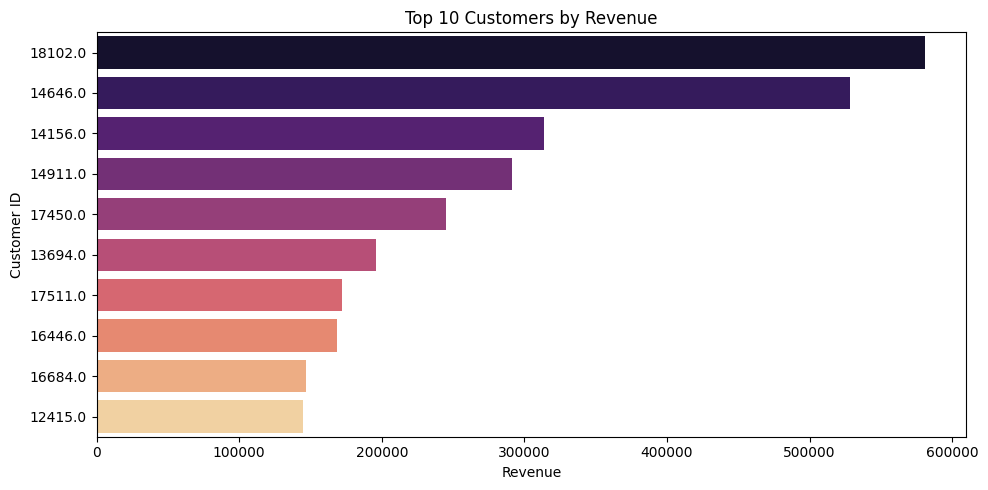

In [18]:
# 👤 Top 10 Customers by Revenue
top_customers = df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='magma')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.savefig('../images/Top 10 Customers by Revenue.png', bbox_inches='tight', dpi=300)
plt.show()


📊 Key Business Insights


1️⃣ Top Products by Revenue
The most revenue-generating products were gift items and decorative accessories.

These items likely had higher sales volume or premium pricing.

📌 Actionable Insight: Focus marketing efforts on top 10 bestsellers and bundle them to increase average order value.

2️⃣ Revenue by Country
The United Kingdom contributed the most revenue (excluded from chart for visibility).

Outside the UK, Netherlands, Germany, and France were top buyers.

📌 Actionable Insight: Strengthen international logistics and consider country-specific promotions.

3️⃣ Monthly Revenue Trend
Revenue showed a seasonal pattern, with noticeable spikes during year-end (November–December).

📌 Actionable Insight: Prepare inventory and promotional campaigns ahead of the holiday season for maximum profitability.

4️⃣ Top Customers by Revenue
A small number of customers contributed significantly to overall revenue.

📌 Actionable Insight: Launch a loyalty program or exclusive discounts for high-value customers.

